In [1]:
import warnings
warnings.filterwarnings('ignore')


# In[25]:

from IPython.display import display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
def won_medal(row):
    if row['gold'] == 1:
        return 1
    if row['silver'] == 1:
        return 1
    if row['bronze'] == 1:
        return 1
    return 0

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
athlete_data = pd.read_csv("./athletes.csv")
countries = pd.read_csv("./countries.csv")
#renaming the "code" column in "countries" table in order to join the tables later
countries.rename(columns={'code':'nationality'}, inplace=True)
#joining the table on "nationality" column
athlete_data = pd.merge(athlete_data, countries,on='nationality')
#changing "sex" column to binary data
athlete_data['sex'] = athlete_data.sex.map(dict(female=1, male=0))
#creating a column indicating wether the athlete won any medal
athlete_data['won_any_medal'] = athlete_data.apply(lambda row: won_medal(row), axis=1)
#converting the "dob" column to datetime
athlete_data['dob'] = pd.to_datetime(athlete_data.dob)
athlete_data['dob'] = athlete_data['dob'].mask(athlete_data['dob'].dt.year > 2016,
                                               athlete_data['dob'] - pd.DateOffset(years=100))

In [2]:
athlete_data = pd.read_csv('./athletes.csv')
sum_woman = 0
sum_man = 0
count_woman = 0
count_man = 0
sex_height_df = athlete_data[['sex','id', 'height']].replace({'male': 0, 'female': 1})
#sex_height_df = sex_height_df.groupby(['sex'])['sex'].size().reset_index(name='counts')
woman = sex_height_df.loc[sex_height_df["sex"] == 1, :] 
woman = woman.dropna()
womans_height_array = woman['height'].to_numpy()

print("-------------------------------------------------------------------------------")
print ('Question 1 Part a')
print("-------------------------------------------------------------------------------")
print("mean of womans height: " + str(woman.height.mean()))
man = sex_height_df.loc[sex_height_df["sex"] == 0, :]
man = man.dropna()
mans_height_array = man['height'].to_numpy()
print("mean of mans height: " + str(man.height.mean()))



-------------------------------------------------------------------------------
Question 1 Part a
-------------------------------------------------------------------------------
mean of womans height: 1.699984208448475
mean of mans height: 1.8209654835558455


In [3]:
print("-------------------------------------------------------------------------------")
print ('Question 1 Part b')
print("-------------------------------------------------------------------------------")
print("CL of woman's height is:")
print(st.t.interval(0.95, len(womans_height_array)-1, loc=np.mean(womans_height_array), scale=st.sem(womans_height_array)))
print("CL of man's height is:")
print(st.t.interval(0.95, len(mans_height_array)-1, loc=np.mean(mans_height_array), scale=st.sem(mans_height_array)))


-------------------------------------------------------------------------------
Question 1 Part b
-------------------------------------------------------------------------------
CL of woman's height is:
(1.6975567968308936, 1.7024116200660664)
CL of man's height is:
(1.8184436676328677, 1.823487299478822)


נציין כי הגבהים של האתלטים בלתי תלויים, ומספר הדגימות גדול, כלומר תנאי משפט הגבול המרכזי מתקיימים ועל כן ניתן להניח כי הממוצע מתפלג נורמלי עם התוחלת והשונויות המתאימות. כלומר ניתן להשתמש בנוסחה זאת לרווח הסמך.

In [4]:
print("-------------------------------------------------------------------------------")
print ('Question 1 Part c')
print("-------------------------------------------------------------------------------")

-------------------------------------------------------------------------------
Question 1 Part c
-------------------------------------------------------------------------------


ג. אם החפיפה בין רווחי הסמך גדולה, ככל הנראה אין הבדל סטטיסטי משמעותי בין שתי הקטגוריות הבינאריות (כלומר, הגובה לא משתנה משמעותית בין המינים). ניתן לראות כי במקרה שלנו אין חפיפה ולכן ניתן להסיק כי גובה הגברים שונה משמעותית מגובה הנשים.

In [5]:
print("-------------------------------------------------------------------------------")
print ('Question 2 Part a & b')
print("-------------------------------------------------------------------------------")

-------------------------------------------------------------------------------
Question 2 Part a & b
-------------------------------------------------------------------------------


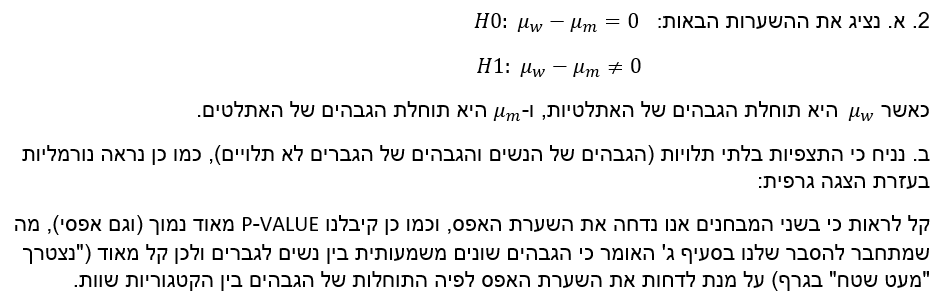

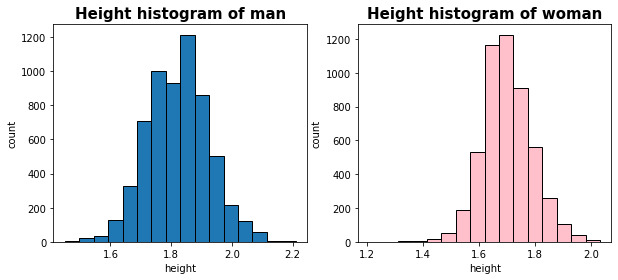

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))

man['height'].hist(edgecolor = "black", grid = False, bins = 16, ax = ax1)
ax1.set_title("Height histogram of man", size = 15, fontweight = "bold")
ax1.set_xlabel("height")
ax1.set_ylabel("count")

woman['height'].hist(edgecolor = "black", grid = False, bins = 16, ax = ax2, color = "pink")
ax2.set_title("Height histogram of woman", size = 15, fontweight = "bold")
ax2.set_xlabel("height")
ax2.set_ylabel("count")

plt.show()

 :F כעת נותר לבדוק האם השונויות שוות באמצעות מבחן




In [7]:
F_stat = man['height'].var()/woman['height'].var()
p_value = 1-st.f.cdf(F_stat, man.shape[0]-1, woman.shape[0]-1)
F_test_q = st.f.ppf(0.95, man.shape[0]-1, woman.shape[0]-1)

print("the F statistic is: {}".format(F_stat))
print("the P value is: {}".format(p_value))
print("the F test quantile is: {}".format(F_test_q))
print("Is the statistic in reject region? {}".format(F_stat > F_test_q))

the F statistic is: 1.3086421838136957
the P value is: 1.1102230246251565e-16
the F test quantile is: 1.0452027464905191
Is the statistic in reject region? True


קל לראות כי השונויות שונות כיוון שקיבלנו סטטיסטי באיזור הדחייה של השערת האפס שלפיה השונויות שוות.

In [8]:
# T test
print("-------------------------------------------------------------------------------")
print ('Question 2 Part c')
print("-------------------------------------------------------------------------------") 
T_stat, P_value = st.ttest_ind(man['height'], woman['height'])
T_test_q = st.t.ppf(0.975, man.shape[0]+woman.shape[0]-2)
print("the T statistic: {}".format(T_stat))
print("the P value: {}".format(P_value))
print("the T test quantile: {}".format(T_test_q))
print("Is in Reject Region: {}".format(T_test_q < abs(T_stat)))

-------------------------------------------------------------------------------
Question 2 Part c
-------------------------------------------------------------------------------
the T statistic: 66.89357195646475
the P value: 0.0
the T test quantile: 1.960175703540993
Is in Reject Region: True


In [9]:
print("-------------------------------------------------------------------------------")
print ('Question 2 Part d')
print("-------------------------------------------------------------------------------") 
sample_var_woman = (np.std(womans_height_array))**2
sample_var_man = (np.std(mans_height_array))**2
Wald_stat = (man.height.mean() - woman.height.mean())/((sample_var_man/len(mans_height_array)+ sample_var_woman/len(womans_height_array))**1/2)
P_value = 2*st.norm.cdf(-abs(Wald_stat))
W_test_quantile = st.t.ppf(0.975, len(mans_height_array)+len(womans_height_array)-2)

print("the Wald statistic is: {}".format(Wald_stat))
print("the P value is: {}".format(P_value))
print("the W test quantile is: {}".format(W_test_quantile))
print("Is in the Reject Region?: {}".format(W_test_quantile < abs(Wald_stat)))

-------------------------------------------------------------------------------
Question 2 Part d
-------------------------------------------------------------------------------
the Wald statistic is: 75911.60059324805
the P value is: 0.0
the W test quantile is: 1.960175703540993
Is in the Reject Region?: True


In [10]:
print("-------------------------------------------------------------------------------")
print ('Question 2 Part e')
print("-------------------------------------------------------------------------------") 

-------------------------------------------------------------------------------
Question 2 Part e
-------------------------------------------------------------------------------


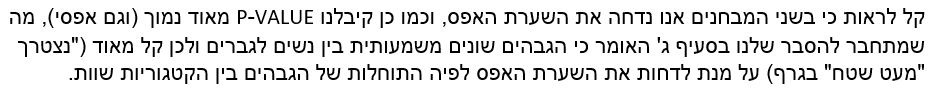


In [11]:
import math
def e_multiplication(sample_vals, n_samples, s_p_2, mean):
    result = 0
    for i in range(n_samples):
        result = (-(sample_vals[i]-mean)**2/(2*s_p_2))+result
    #print (result)
    return result 
    # n_samples*(math.log((((2*math.pi)**0.5)*(s_p_2))))

In [12]:
# under all Hs
print("-------------------------------------------------------------------------------")
print ('Question 2 Part f')
print("-------------------------------------------------------------------------------") 
s_p_2 = ((len(mans_height_array)-1)*sample_var_man+(len(womans_height_array)-1)*sample_var_woman)/(len(mans_height_array)+len(womans_height_array)-2)
man_sample = man["height"].values
woman_sample = woman["height"].values
man_woman_df = np.concatenate((man["height"].values, woman["height"].values), axis=None)
mulitplicaiton_woman = e_multiplication(woman_sample, len(womans_height_array), s_p_2, woman.height.mean())
mulitplicaiton_man = e_multiplication(man_sample, len(mans_height_array), s_p_2, man.height.mean())
multi_all = e_multiplication(man_woman_df, len(mans_height_array)+len(womans_height_array), s_p_2, sex_height_df.height.mean())
#likelihood = (mulitplicaiton_woman*mulitplicaiton_man)/(((2*math.pi)**0.5)*(s_p_2))
#print(likelihood)
#print(2*len(mans_height_array+womans_height_array))
#print(math.log(((np.var[sex_height_df['height']])/s_p_2)**0.5))
#print(2*(mulitplicaiton_woman+mulitplicaiton_man-multi_all))
to_var = man_woman_df
#print(np.var(to_var))
likelihood_stat = 2*(len(mans_height_array)+len(womans_height_array))*math.log(((np.var(to_var))/s_p_2)**0.5)+2*(mulitplicaiton_woman+mulitplicaiton_man-multi_all)
print("the likelihood statistic is: " + str(likelihood_stat))
chisq_test_q = st.chi2.ppf(0.95,1)
print("the Chi-squared distribution quantile is: " + str(chisq_test_q))
if(likelihood_stat > chisq_test_q):
  print("Is in rejection region? Yes. The expectations are not equal")
else:
  print("Is in rejection region? No. The expectations are equal")




-------------------------------------------------------------------------------
Question 2 Part f
-------------------------------------------------------------------------------
the likelihood statistic is: 8241.227340877278
the Chi-squared distribution quantile is: 3.841458820694124
Is in rejection region? Yes. The expectations are not equal


In [13]:
def plot_heights_hist(df_women, df_men, n_size):
    height_women = df_women.loc[:, 'height'].to_numpy()
    height_men = df_men.loc[:, 'height'].to_numpy()
    plt.figure()
    n, bins, patches = plt.hist(height_men, bins=16, density=True, color='skyblue', edgecolor='#069AF3', alpha=0.9,
                                rwidth=0.85, label='Men')  # ,ax=ax1)
    n, bins, patches = plt.hist(height_women, bins=16, density=True, color='#FFC0CB', edgecolor='#FF81C0', alpha=0.9,
                                rwidth=0.85, label='Women')  # ,ax=ax2)
    plt.legend()
    title_to_plt = f'Man & Women Heights Distributions for Sample Size = {n_size}'
    plt.title(title_to_plt)
    plt.savefig(f'{title_to_plt}.png')
    plt.show()

In [14]:
def confidence_interval(df):
    x = df.loc[:, 'height'].to_numpy()
    m = x.mean()
    s = st.sem(x)
    n = x.shape[0]
    confidence = 0.95
    ci = st.t.interval(confidence, n, loc=m, scale=s)
    return ci


In [15]:
def waled_test(df_men, df_women, n_size,print_waled):
    x_women = df_women.loc[:, 'height'].to_numpy()
    x_men = df_men.loc[:, 'height'].to_numpy()
    m_women = x_women.mean()
    m_men = x_men.mean()
    var_women = x_women.std() ** 2
    var_men = x_men.std() ** 2
    n_women = x_women.shape[0]
    n_men = x_men.shape[0]
    s_com = np.sqrt((var_men / n_men) + (var_women / n_women))
    w = np.abs(m_men - m_women) / s_com
    confidence = 0.975
    z = norm.ppf(loc=0, scale=1, q=confidence)
    pvalue = 2 * norm.cdf(-1 * w)
    decline_null_hypothesis = np.abs(w) > z
    if(print_waled):
        print(f'Waled Test for Decline Null Hypothesis : {decline_null_hypothesis}')
        print(f'W = {w} {">"} {z} = Z is {decline_null_hypothesis}')
        print()
    return pvalue, decline_null_hypothesis

In [16]:
def plot_histograms(dict1, dict2, title):
    for n_size in dict1.keys():
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        data1 = np.array(dict1[n_size])
        data2 = np.array(dict2[n_size])
        n, bins, patches = ax1.hist(data1, bins=16, density=True, color='skyblue', edgecolor='#069AF3', alpha=0.9,
                                    rwidth=0.85, label='Men')  # ,ax=ax1)
        n, bins, patches = ax2.hist(data2, bins=16, density=True, color='#FFC0CB', edgecolor='#FF81C0', alpha=0.9,
                                    rwidth=0.85, label='Women')  # ,ax=ax2)
        ax1.legend()
        ax2.legend()
        ax1.set_yticklabels([])
        max_freq = np.max(data1)
        plt.ylim(ymax=np.ceil(max_freq / int(n_size)) * int(n_size))
        title_to_plt = title + f' with Size = {n_size}'
        fig.suptitle(title_to_plt)
        plt.savefig(f'{title_to_plt}.png')
        plt.show()


In [17]:
def plot_pvalues(dict, title):
    for n_size in dict.keys():
        p_value = dict[n_size]
        plt.figure()
        n, bins, patches = plt.hist(p_value, bins=16, density=True, color='green', edgecolor='darkgreen', alpha=0.2,
                                    rwidth=0.85)
        title_to_plt = title + f' with Size = {n_size}'
        plt.title(title_to_plt)
        plt.savefig(f'{title_to_plt}.png')
        plt.show()

-------------------------------------------------------------------------------
Question 3 Part a & b
-------------------------------------------------------------------------------
Confidence Interval for Women with total sample size = 30
(1.6347499561690007, 1.7616136801946358)
Confidence Interval for Men with total sample size = 30
(1.8067704511914484, 1.8837558645980255)
Waled Test for Decline Null Hypothesis : True
W = 4.484901989275694 > 1.959963984540054 = Z is True



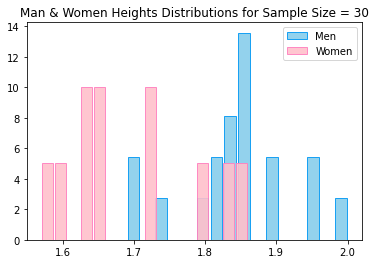

Confidence Interval for Women with total sample size = 50
(1.7099703365652206, 1.785862996768113)
Confidence Interval for Men with total sample size = 50
(1.8000254081234361, 1.8592053611073331)
Waled Test for Decline Null Hypothesis : True
W = 3.571732957080462 > 1.959963984540054 = Z is True



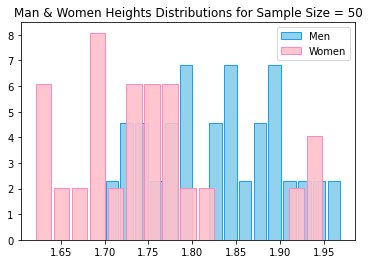

Confidence Interval for Women with total sample size = 100
(1.6590197581026525, 1.7247897657068716)
Confidence Interval for Men with total sample size = 100
(1.802629921580375, 1.8577149060058311)
Waled Test for Decline Null Hypothesis : True
W = 6.55253939033731 > 1.959963984540054 = Z is True



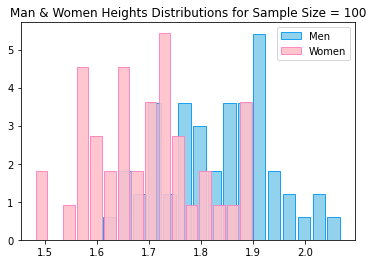

Confidence Interval for Women with total sample size = 500
(1.7001729850439273, 1.7238270149560726)
Confidence Interval for Men with total sample size = 500
(1.801299829390636, 1.8258430277522208)
Waled Test for Decline Null Hypothesis : True
W = 11.76187494002369 > 1.959963984540054 = Z is True



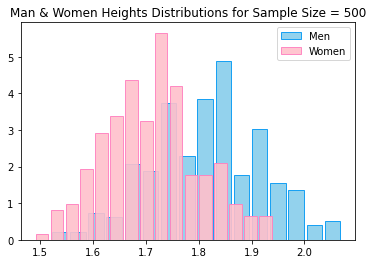

In [18]:
athlets = pd.read_csv("./athletes.csv")
athlets = athlets[['id', 'sex', 'height']]
ci_dict = {}
print("-------------------------------------------------------------------------------")
print ('Question 3 Part a & b')
print("-------------------------------------------------------------------------------")
for n_size in [30, 50, 100, 500]:
    df = (athlets.dropna()).sample(n_size)
    df = df.replace({'male': 0, 'female': 1})
    df_men = df.loc[df["sex"] == 0, :]
    df_women = df.loc[df["sex"] == 1, :]
    ci_dict[f'women_{n_size}'] = confidence_interval(df_women)
    ci_dict[f'men_{n_size}'] = confidence_interval(df_men)
    print(f'Confidence Interval for Women with total sample size = {n_size}')
    print(ci_dict[f'women_{n_size}'])
    print(f'Confidence Interval for Men with total sample size = {n_size}')
    print(ci_dict[f'men_{n_size}'])
    waled_test(df_men, df_women, n_size,print_waled=True)
    plot_heights_hist(df_women, df_men, n_size)


In [19]:
print("-------------------------------------------------------------------------------")
print('CI Comparsion to Q1')
print("-------------------------------------------------------------------------------")
print("In comparsion to q1, as the sample size got bigger, the confidence interval got similiar to the CI we found in Q1.")
print("This result is not surprising, since with a greater sample size the maximum-likelihood-estimator is closer to the the real distribution parameters - which we know as the Weak Law of Large Number ")

print("-------------------------------------------------------------------------------")
print('Waled Test results Comparsion to Q2')
print("-------------------------------------------------------------------------------")
print("In comparsion to q2, We can see Waled Test rejected H0 for any sample size in [50,100,500]")
print("This fits the explantion of Q2, but since 30 is relatively 'low' sample size, the result of decline or accept H0 depends higly on the sample values, means might include outliers which we know mean is very sensitive to.")

-------------------------------------------------------------------------------
CI Comparsion to Q1
-------------------------------------------------------------------------------
In comparsion to q1, as the sample size got bigger, the confidence interval got similiar to the CI we found in Q1.
This result is not surprising, since with a greater sample size the maximum-likelihood-estimator is closer to the the real distribution parameters - which we know as the Weak Law of Large Number 
-------------------------------------------------------------------------------
Waled Test results Comparsion to Q2
-------------------------------------------------------------------------------
In comparsion to q2, We can see Waled Test rejected H0 for any sample size in [50,100,500]
This fits the explantion of Q2, but since 30 is relatively 'low' sample size, the result of decline or accept H0 depends higly on the sample values, means might include outliers which we know mean is very sensitive to.


-------------------------------------------------------------------------------
Question 3 Part d
-------------------------------------------------------------------------------
Mean founded in Q1:
Women : 1.699984208448475
Men:1.8209654835558455

Sample Size = 30:
Women mean calculated at Q1 appears in the Confidence Interval 92% of the times.
Men mean calculated at Q1 appears in the Confidence Interval 98% of the times.
Waled Test results in decline Null Hypothesis in : 92% of the times.

Sample Size = 50:
Women mean calculated at Q1 appears in the Confidence Interval 91% of the times.
Men mean calculated at Q1 appears in the Confidence Interval 94% of the times.
Waled Test results in decline Null Hypothesis in : 98% of the times.

Sample Size = 100:
Women mean calculated at Q1 appears in the Confidence Interval 95% of the times.
Men mean calculated at Q1 appears in the Confidence Interval 98% of the times.
Waled Test results in decline Null Hypothesis in : 100% of the times.

Sample

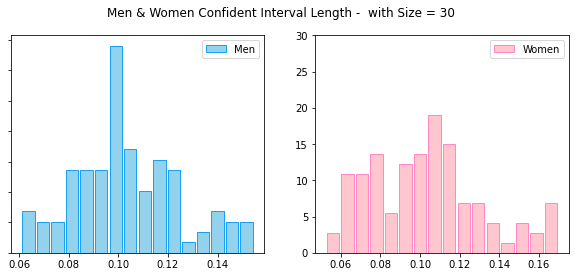

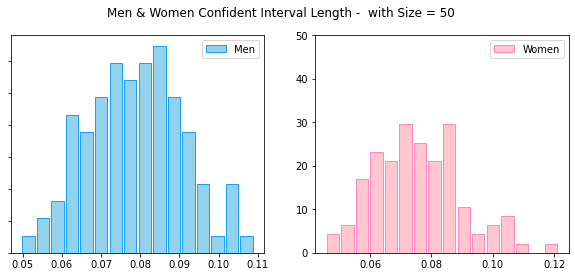

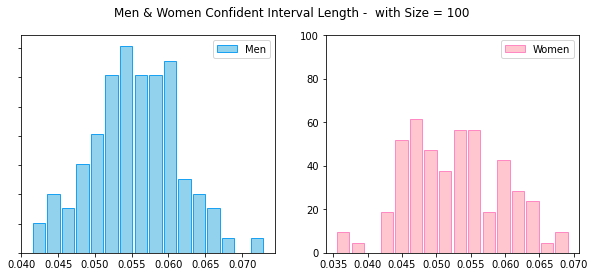

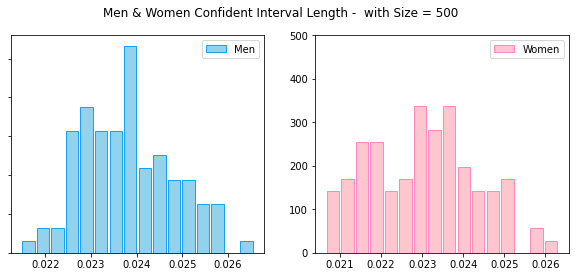

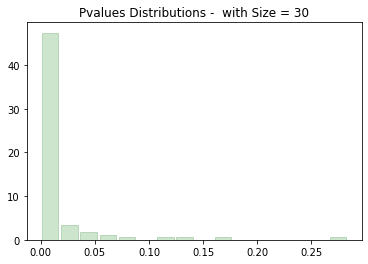

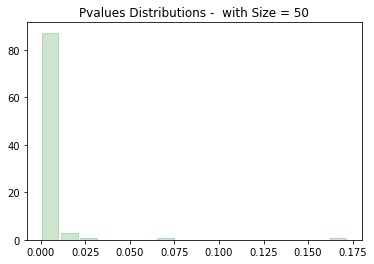

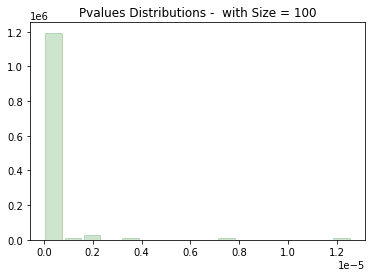

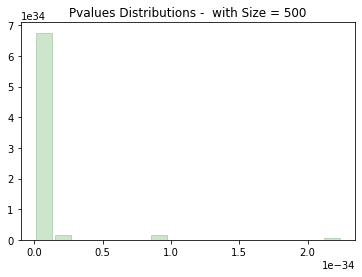

In [20]:
print("-------------------------------------------------------------------------------")
print('Question 3 Part d')
print("-------------------------------------------------------------------------------")
q1_women_mean = 1.699984208448475
q1_men_mean = 1.8209654835558455
sample_sizes = ['30', '50', '100', '500']
men_ci_lens = {key: [] for key in sample_sizes}
women_ci_lens = {key: [] for key in sample_sizes}
p_values = {key: [] for key in sample_sizes}
print(f'Mean founded in Q1:\nWomen : {q1_women_mean}\nMen:{q1_men_mean}')
print()
for n_size in [30, 50, 100, 500]:
    declined_H0 = 0
    women_mean_in_ci = 0
    men_mean_in_ci = 0
    for i in range(1, 101):
        df = (athlets.dropna()).sample(n_size)
        df = df.replace({'male': 0, 'female': 1})
        df_men = df.loc[df["sex"] == 0, :]
        df_women = df.loc[df["sex"] == 1, :]
        ci_women = confidence_interval(df_women)
        ci_men = confidence_interval(df_men)
        ci_len_women = ci_women[1] - ci_women[0]
        ci_len_men = ci_men[1] - ci_men[0]
        ci_dict[f'women_{n_size}'] = ci_women
        ci_dict[f'men_{n_size}'] = ci_men
        pvalue, decline_null_hypothesis = waled_test(df_men, df_women, n_size,print_waled=False)
        p_values[str(n_size)].append(pvalue)
        women_ci_lens[str(n_size)].append(ci_len_women)
        men_ci_lens[str(n_size)].append(ci_len_men)
        women_mean_in_ci += (ci_women[0] <= q1_women_mean <= ci_women[1])
        men_mean_in_ci += (ci_men[0] <= q1_men_mean <= ci_men[1])
        declined_H0 += decline_null_hypothesis
    print(f'Sample Size = {n_size}:')
    print(
        f'Women mean calculated at Q1 appears in the Confidence Interval {women_mean_in_ci}% of the times.')
    print(
        f'Men mean calculated at Q1 appears in the Confidence Interval {men_mean_in_ci}% of the '
        f'times.')
    print(f'Waled Test results in decline Null Hypothesis in : {declined_H0}% of the times.')
    print()
plot_histograms(men_ci_lens, women_ci_lens, "Men & Women Confident Interval Length - ")
plot_pvalues(p_values, "Pvalues Distributions - ")
